<a href="https://colab.research.google.com/github/SiEggo/004_AhmadYunus_Posstest2_Datmin/blob/main/004_AhmadYunus_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libary
import pandas as pd
import seaborn as sns
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
# Membaca Dataset Dari Excel
df = pd.read_excel("Dataset_Apriori.xlsx")

In [ ]:
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergen,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergen               1
dish cleaner           1
cling film/bags        1
dtype: int64

In [ ]:
# Melihat daftar columns yang tersedia
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergen', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [ ]:
# Membuat Kombinasi tiap item
rules = list(permutations(df.columns,2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergen'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('p

In [ ]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)])>0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [ ]:
# Mengganti directory
hitung = {}
for rule in rule_baru:
  banyak_data = len(df[
      # Menghitung banyaknya kombinasi yang ada
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung[str(rule)] = banyak_data
hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

In [ ]:
# List Support (ab/len(df)*100%)
print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole 

In [ ]:
# List Confidens (ab/df.sum*100%)
print("---")
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}-->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk-->pastry Confidence = 20.0%
whole milk-->salty snack Confidence = 20.0%
whole milk-->sausage Confidence = 40.0%
whole milk-->semi-finished bread Confidence = 20.0%
whole milk-->yogurt Confidence = 20.0%
whole milk-->soda Confidence = 20.0%
whole milk-->rolls/buns Confidence = 20.0%
whole milk-->butter Confidence = 20.0%
pastry-->whole milk Confidence = 100.0%
pastry-->salty snack Confidence = 100.0%
salty snack-->whole milk Confidence = 100.0%
salty snack-->pastry Confidence = 100.0%
sausage-->whole milk Confidence = 50.0%
sausage-->semi-finished bread Confidence = 25.0%
sausage-->yogurt Confidence = 25.0%
sausage-->hygiene articles Confidence = 25.0%
sausage-->rolls/buns Confidence = 50.0%
semi-finished bread-->whole milk Confidence = 100.0%
semi-finished bread-->sausage Confidence = 100.0%
semi-finished bread-->yogurt Confidence = 100.0%
yogurt-->whole milk Confidence = 100.0%
yogurt-->sausage Confidence = 100.0%
yogurt-->semi-finished bread Confidence = 100.0%
soda-->

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

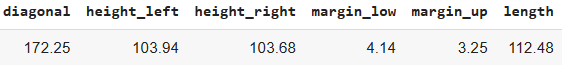
<!-- 1412 -->

In [ ]:
# Import Libary
import math

In [ ]:
# Membaca Dataset
df = pd.read_csv('deteksi_uang_palsu.csv')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Data target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Menghitung jarak Euclidean untuk setiap data pada dataset
jarak = []
for i in range(len(df)):
    dist = 0
    for j in range(1, len(df.columns)):
        dist += (df.iloc[i,j] - target[j-1])**2
    jarak.append(math.sqrt(dist))

# Tambahkan kolom jarak pada dataset
df['jarak'] = jarak

# Tampilkan hasil
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Menambahkan kolom jarak untuk setiap data terhadap target prediksi
df["jarak"] = ((df.diagonal - target[0])**2 + 
               (df.height_left - target[1])**2 +
               (df.height_right - target[2])**2 +
               (df.margin_low - target[3])**2 +
               (df.margin_up - target[4])**2 +
               (df.length - target[5])**2)**0.5

# Mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(df)))
terdekat = df.sort_values(by=["jarak"]).head(k)

# Menampilkan hasil pengurutan
terdekat

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Hitung jarak Euclidean
df["jarak"] = (((df["diagonal"]-target[0])**2)+
               ((df["height_left"]-target[1])**2)+
               ((df["height_right"]-target[2])**2)+
               ((df["margin_low"]-target[3])**2)+
               ((df["margin_up"]-target[4])**2)+
               ((df["length"]-target[5])**2))**(1/2)

# Urutkan data berdasarkan jarak terdekat
k = round(len(df)**0.5)
data = df.sort_values("jarak")[:k]

# Tentukan hasil prediksi berdasarkan label terbanyak
prediksi = data["is_genuine"].value_counts().idxmax()
print("Hasil prediksi:", prediksi)

Hasil prediksi: True


# (3) Analisis

> Nama  : Ahmad Yunus

> Nim   : 2109116004

> Judul : Student Mental Health

> Link : https://www.kaggle.com/datasets/shariful07/student-mental-health


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Businnes Understanding

Pentingnya kesehatan mental pada mahasiswa tidak dapat ditekankan lagi. Ketika mahasiswa meninggalkan segala sesuatu yang mereka kenal dan masuk ke universitas, mereka mungkin mengalami ketegangan emosional dan mental. Mahasiswa dari berbagai program studi, usia, dan tahun dapat mengalami gangguan mental pada suatu saat dalam hidup mereka.

PENELITIAN STATISTIK TENTANG PENGARUH KESEHATAN MENTAL TERHADAP IPK MAHASISWA dataset. Kumpulan data ini dikumpulkan melalui survei yang dilakukan melalui formulir Google dari mahasiswa untuk memeriksa situasi akademik dan kesehatan mental mereka saat ini.

### **Business Objective**
 Kumpulan data ini dikumpulkan melalui survei yang dilakukan melalui formulir Google dari mahasiswa untuk memeriksa situasi akademik dan kesehatan mental mereka saat ini.

### **Assess Situation**
Banyak kondisi kesehatan mental yang dapat diobati secara efektif dengan biaya yang relatif rendah, namun kesenjangan antara orang yang membutuhkan perawatan dan mereka yang memiliki akses ke perawatan masih cukup besar. Cakupan pengobatan yang efektif masih sangat rendah.

###**Data Mining Goals**
Membuat model untuk menjadikan Informasi dari data yang ada

###**Produce Project Plan**
* Menyiapkan data
* Melakukan eksplorasi dari data
* Membuat model prediksi dengan menggunakan algoritma Machine Learning yang tepat

## Data Preparition

In [ ]:
# Membaca Dataset
df = pd.read_csv("Student_Mental_health.csv")
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
# Informasi columns dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Menurut output di atas, kita memiliki 101 entri atau baris, serta 11 fitur. Kolom "Non-Null Count" menunjukkan jumlah entri yang tidak nol. Jika jumlahnya 101 maka tidak ada nilai yang hilang untuk fitur tersebut. 'Apakah Anda mencari spesialis untuk perawatan' adalah target kami, atau variabel respons, dan fitur lainnya adalah variabel prediktor kami.

Kami juga memiliki campuran tipe data numerik (1 float64) dan objek (10 objek).

In [ ]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Dari informasi di atas, kita dapat menyimpulkannya:

* Age column memiliki nilai yang hilang.
* Timestamp tidak diuraikan sebagai objek DateTime, tetapi kita dapat bekerja dengannya karena data dikumpulkan pada hari yang sama.
* What is your course?, Your current year of Study , and What is your CGPA? berada dalam tipe data objek yang perlu kita telusuri lebih lanjut.
* Semua Kolom Lainnya memiliki nilai Ya/Tidak yang membutuhkan persiapan dan eksplorasi lebih lanjut.

Mari Ubah Nama Kolom kita untuk membuat kerangka data kita lebih mudah dipahami

In [ ]:
#Rename columns
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Mari kita periksa nilai rata-rata usia untuk menggantikan nilai yang hilang.

In [ ]:
df.Age.describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [ ]:
# Memeriksa jumlah nilai nol dalam fitur Usia.
df.Age.isnull().sum()

1

In [ ]:
# Mengganti Nilai Nol dengan rata-rata Usia - 20,53
# Saya membulatkan nilainya menjadi 21.
df.Age.fillna(21, inplace=True)
df.Age.isnull().sum()

0

In [ ]:
# Tidak ada lagi Nilai Hilang dan Null.
df.isnull().sum()

Date_Time         0
Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

In [ ]:
# Menguraikan kolom Tahun dan membuatnya dalam format yang bersih
# Formatting the Year column
df['Year'].unique().tolist()

['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3']

Dengan info di atas:

* Durasi maksimum untuk program studi tertentu adalah 4 tahun sesuai dengan data. Durasi minimum tidak dapat ditentukan.
* Tahun 1 dan tahun 1 memiliki arti yang sama (dan sama dengan nilai lainnya) namun ditafsirkan berbeda.
* Tidak perlu kata 'Tahun' atau 'tahun', kita dapat bekerja hanya dengan angka dengan membersihkan teks.

In [ ]:
def cleanText(text):
    text = text[-1]
    text = int(text)
    return text
df["Year"] = df["Year"].apply(cleanText)
print("Nilai 5 pertama setelah Membersihkan teks Kolom Tahun")
print(df["Year"][:5], "\n")

Nilai 5 pertama setelah Membersihkan teks Kolom Tahun
0    1
1    2
2    1
3    3
4    4
Name: Year, dtype: int64 



In [ ]:
# periksa kolom IPK dalam kerangka data
df['CGPA'].unique().tolist()

['3.00 - 3.49',
 '3.50 - 4.00',
 '3.50 - 4.00 ',
 '2.50 - 2.99',
 '2.00 - 2.49',
 '0 - 1.99']

Dengan info di atas:

Kolom IPK memiliki rentang, bukan nilai absolut.
Kisaran '3.50 - 4.00' sama dengan '3.50 - 4.00', jadi kita perlu memangkas spasi di belakangnya.
Rentang dapat dikonversi ke nilai rata-ratanya, tetapi disini akan dibiarkannya seperti itu untuk eksplorasi lebih lanjut.

In [ ]:
def remove_space(delimstrng):
    delimstrng = delimstrng.strip()
    return delimstrng
df["CGPA"] = df["CGPA"].apply(remove_space)
print("Lima nilai pertama IPK setelah membersihkan spasi dari kolom IPK:")
print(df["CGPA"][:5], "\n")
print(df['CGPA'].unique().tolist())

Lima nilai pertama IPK setelah membersihkan spasi dari kolom IPK:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
3    3.00 - 3.49
4    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99']


In [ ]:
# Sekarang mari kita lihat daftar mata kuliah yang telah didaftarkan oleh mahasiswa dan jumlah total mata kuliah:
course_list = df['Course'].unique().tolist()
print(course_list,'\n','\n','Number Of courses -',len(course_list))

['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'] 
 
 Number Of courses - 49


Kita dapat melihat ada beberapa mata kuliah dengan nama yang berbeda tetapi arti dan referensinya sama. Misalnya - Engine, Engin, dan Engineer memiliki arti yang sama.

In [ ]:
# Mari ganti nama kursus yang berlebihan dengan nama kursus standar
df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)

In [ ]:
# Daftar Kursus Baru dengan Jumlah Daftar
course_list = df['Course'].unique().tolist()
print(course_list,'\n\n','Number Of courses -',len(course_list))

['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'] 

 Number Of courses - 49


In [ ]:
# Sebelum beralih ke Eksplorasi Data, mari kita lihat bagaimana tampilan dataframe kita yang telah diperbarui:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


## Data Understanding

### Data Exploration

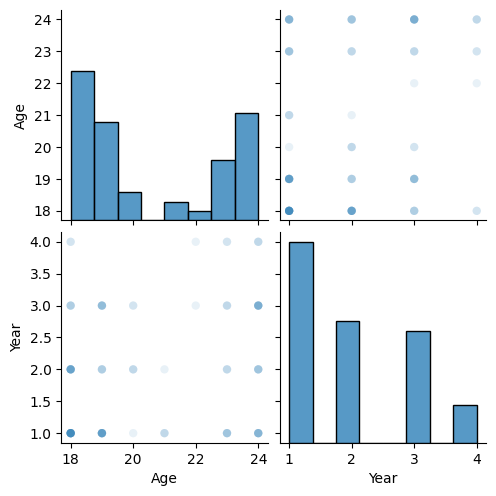

In [ ]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none',))

Dengan Visualisasi ini, bahwa:

* Tidak ada Pencilan pada Yead dan Age.
* Visualisasi ini tidak cukup untuk analisis kami dan kami membutuhkan eksplorasi lebih lanjut

In [ ]:
mata_kuliah_per_mahasiswa = df.Course.value_counts()
mata_kuliah_per_mahasiswa

Engineering                20
BCS                        18
IT                         11
Biomedical science          4
KOE                         4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Koe                         2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Diploma Nursing             1
Biotechnology               1
Communication               1
Econs                       1
Pendidikan Islam            1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KENMS     

Text(0.5, 1.0, 'Student Count for Year 1')

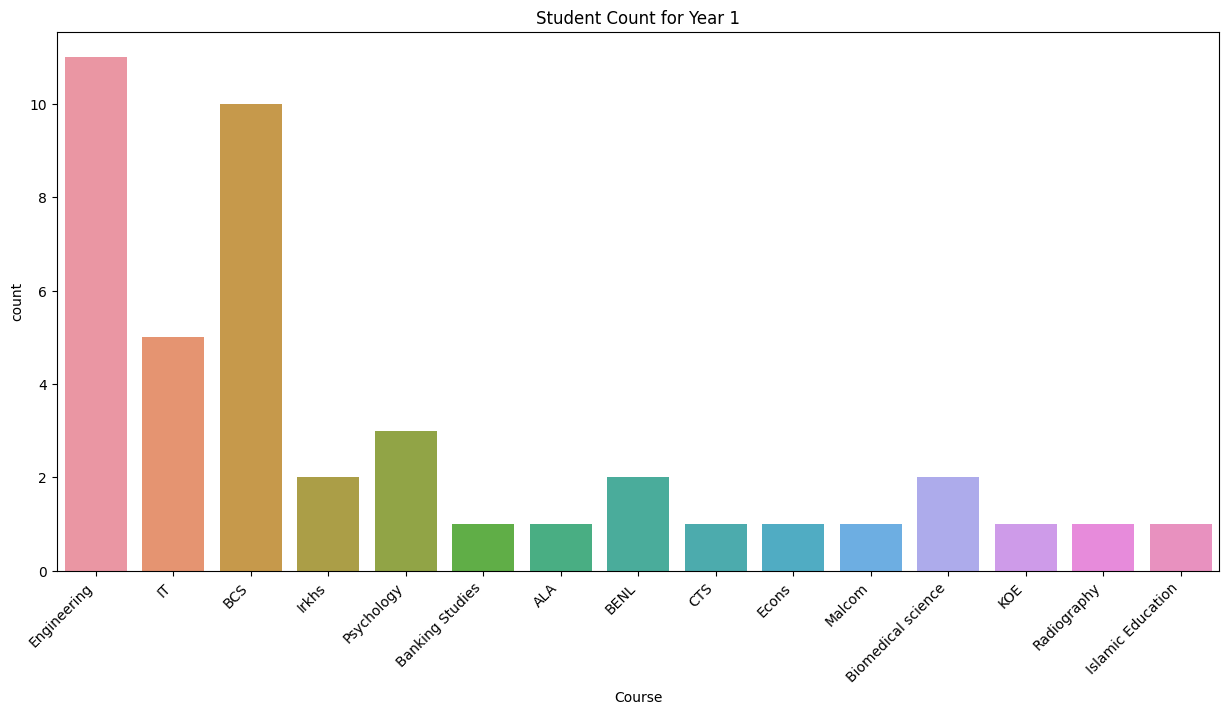

In [ ]:
# Plot countplot mahasiswa di setiap mata kuliah sesuai dengan tahun mereka belajar
# Countplot untuk Tahun Pertama

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Jumlah mahasiswa untuk kelas tahun pertama')

Text(0.5, 1.0, 'Jumlah mahasiswa untuk kelas tahun kedua')

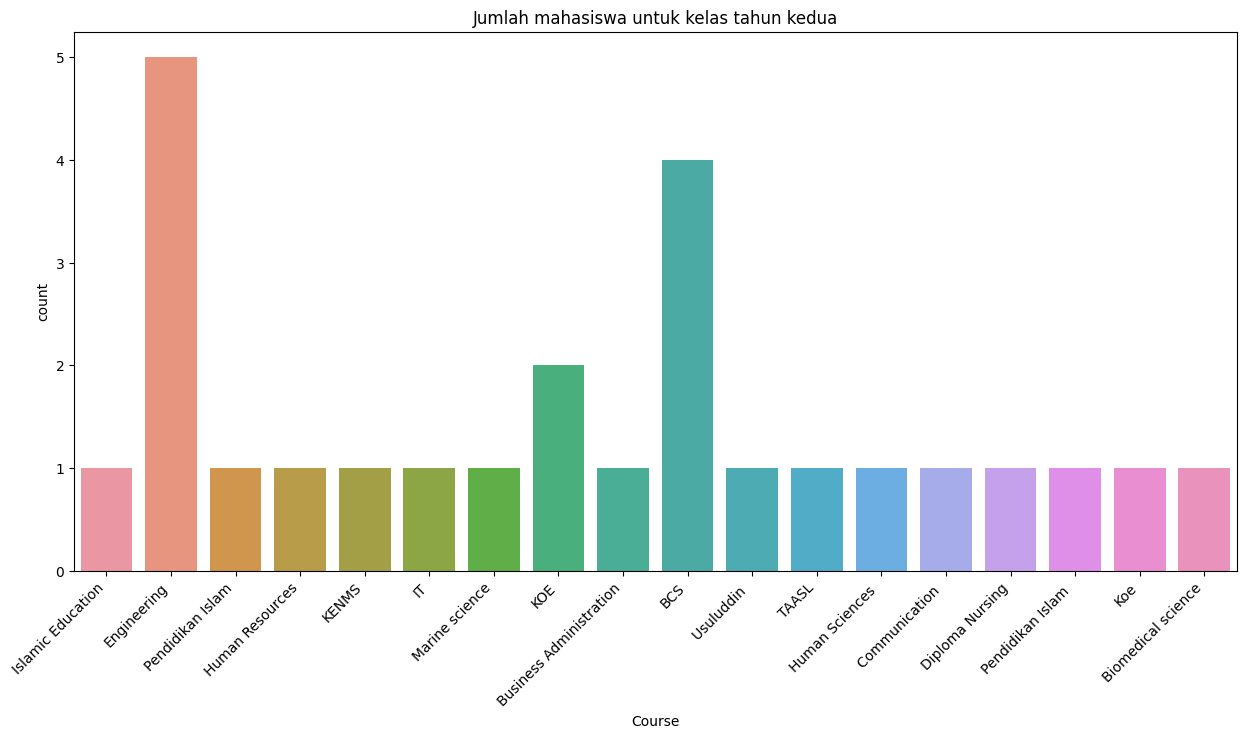

In [ ]:
#Countplot untuk tahun kedua

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Jumlah mahasiswa untuk kelas tahun kedua')

Text(0.5, 1.0, 'Jumlah mahasiswa untuk kelas tahun ketiga')

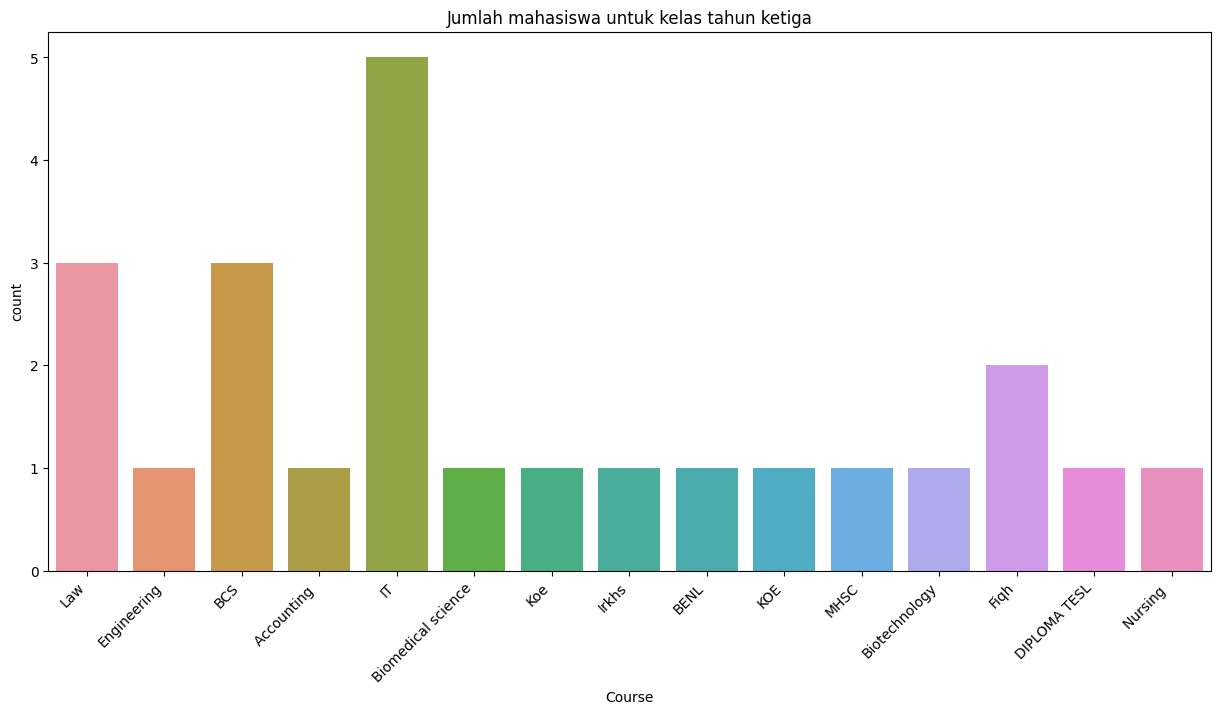

In [ ]:
#Countplot untuk tahun ketiga

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Jumlah mahasiswa untuk kelas tahun ketiga')

Text(0.5, 1.0, 'Jumlah mahasiswa untuk kelas tahun keempat')

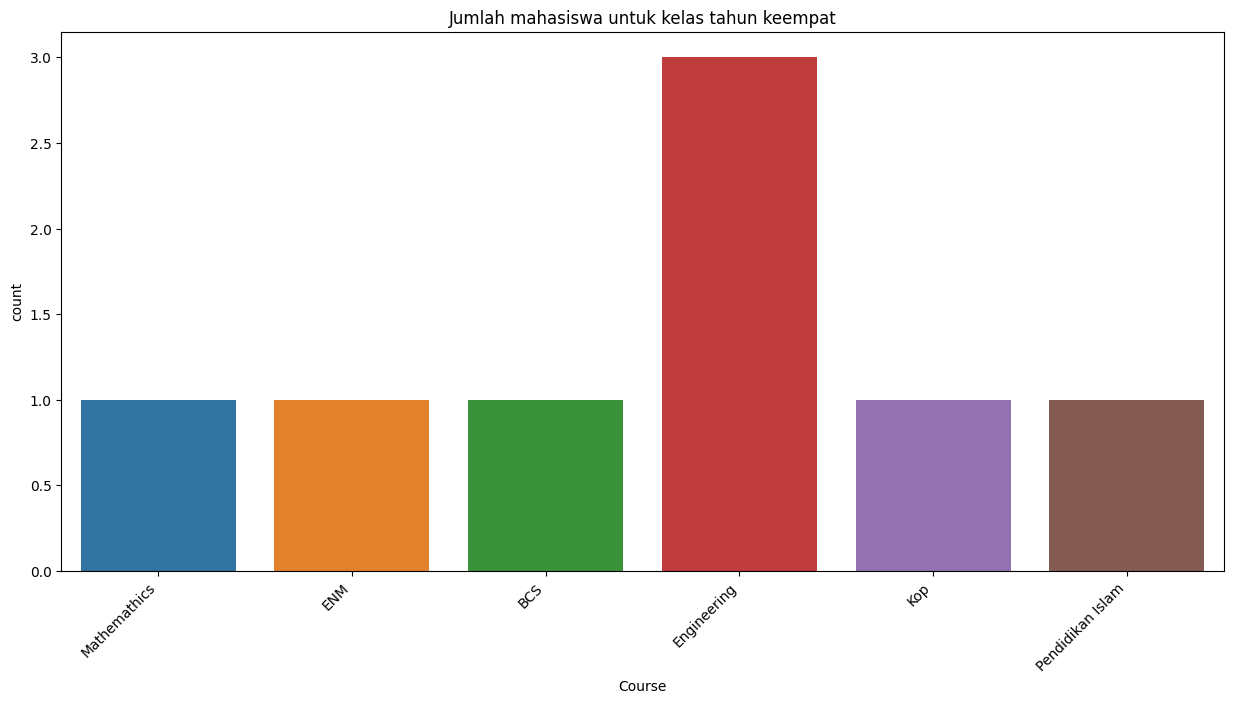

In [ ]:
#Countplot untuk tahun keempat

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Jumlah mahasiswa untuk kelas tahun keempat')

Dengan info di atas, kami dapat mengatakan bahwa:

* Mahasiswa maksimum berasal dari jurusan Teknik. Kecuali di Tahun ke-3, Mahasiswa Teknik memiliki nilai maksimum di setiap tahun.
* Mata Kuliah yang hilang dari Tahun ke-4 (sumbu x) harus memiliki durasi mata kuliah 3 tahun.
* Mahasiswa Teknik, BCS dan TI menguasai survei dengan jumlah tanggapan maksimum
* Mayoritas survei berasal dari mahasiswa teknik.

In [ ]:
# Jumlah Mahasiswa yang mengalami kecemasan
df.Anxiety.value_counts()

No     67
Yes    34
Name: Anxiety, dtype: int64

Text(0.5, 1.0, 'Anxiety VS Courses')

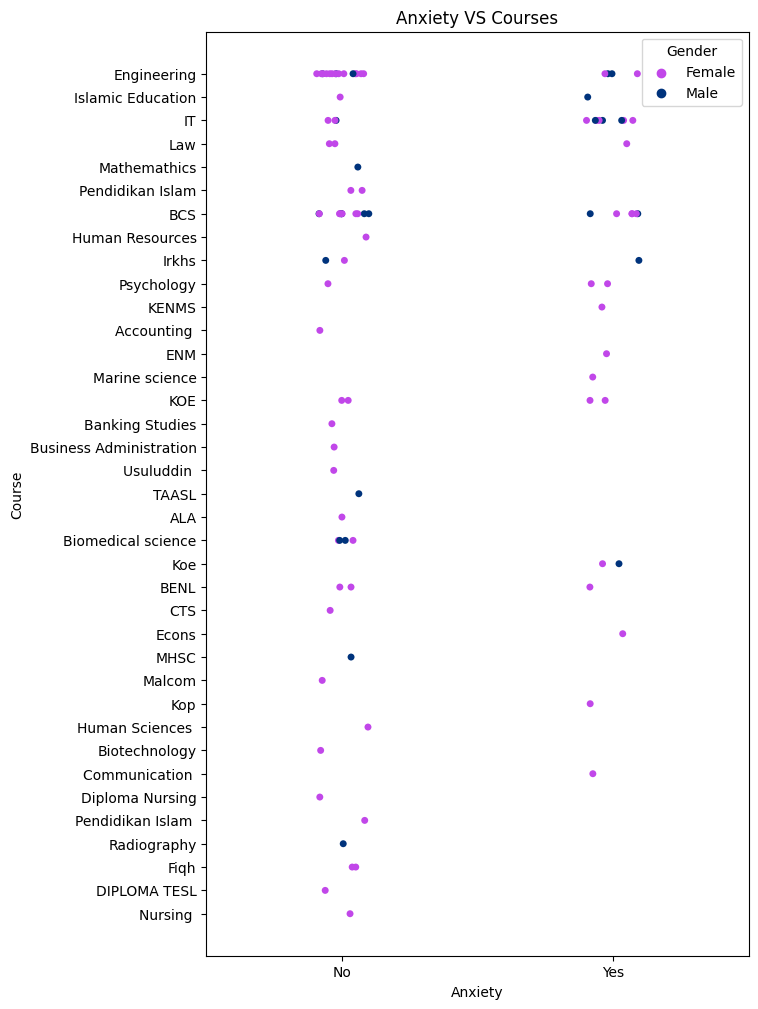

In [ ]:
# Strip-plot untuk Kecemasan masing-masing untuk setiap jurusan
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Anxiety', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Anxiety VS Courses')

**Kecemasan(Anxiety) vs Jurusan(Course)**

Berikut adalah beberapa statistiknya:

* Siswa yang terdaftar di bidang IT mengalami kecemasan maksimum.
* Mahasiswa yang terdaftar di bidang yang berkaitan dengan Islam (Pendidikan Islam, Pendidikan Islam, Fiqih, Usuluddin, dll.) dan Biologi (Ilmu Pengetahuan Manusia, Keperawatan, Ilmu Biomedis) tidak terlalu rentan terhadap kecemasan.
* Ilmu Komputer (BCS) memiliki jumlah yang hampir sama antara mahasiswa yang mengalami kecemasan dan yang tidak mengalami kecemasan.

In [ ]:
# Jumlah mahasiswa yang mengalami despresi
df.Depression.value_counts()

No     66
Yes    35
Name: Depression, dtype: int64

Text(0.5, 1.0, 'Depression VS Courses')

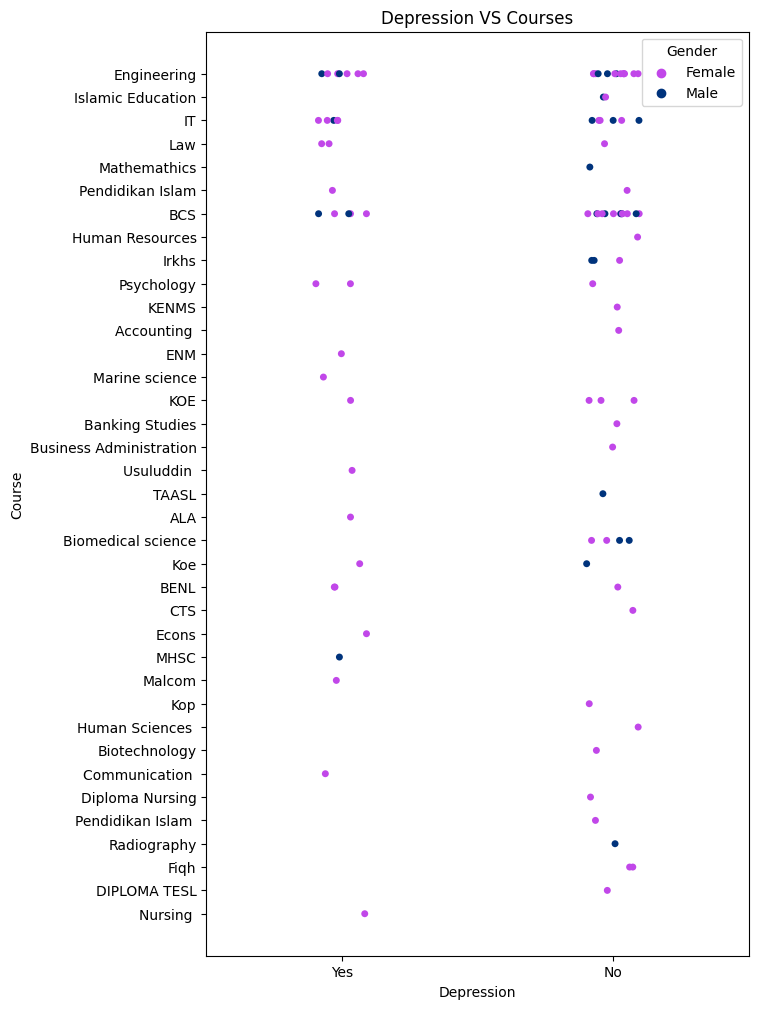

In [ ]:
# Memeriksa Jurusan mana yang memiliki lebih banyak mahasiswa yang menderita Depresi.
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Depression', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Depression VS Courses')

In [ ]:
# Pengolompkan pada jenis kelamin
df.Depression.groupby(df['Gender']).value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
Name: Depression, dtype: int64

**Depresi vs Jurusan**

Berikut adalah beberapa statistiknya:

* Laki-laki lebih tidak mudah mengalami depresi dibandingkan dengan perempuan.
* 2/3 perempuan dalam Psikologi mengalami depresi,
Sekitar 50% Mahasiswa di bidang IT mengalami depresi.

In [ ]:
# Jumlah mahasiswa yang mengalami Kecemasan
df.Panic_Attack.value_counts()

No     68
Yes    33
Name: Panic_Attack, dtype: int64

Text(0.5, 1.0, 'Panic Attack VS Courses')

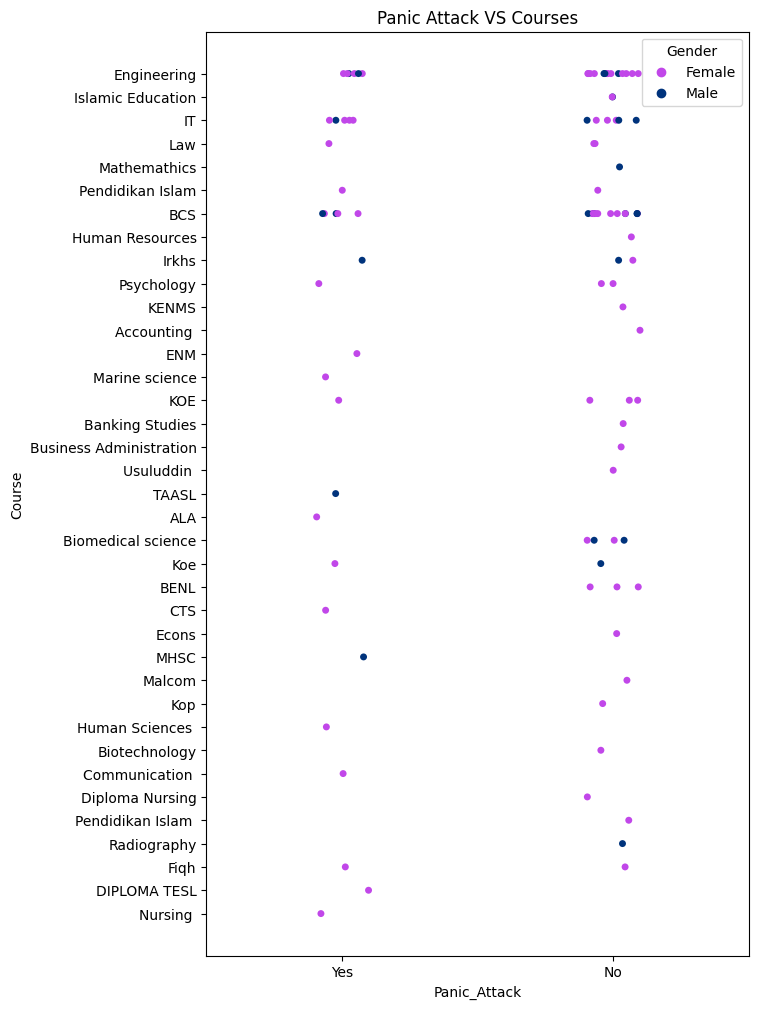

In [ ]:
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Panic_Attack', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Panic Attack VS Courses')

**Serangan Panik vs Jurusan**

Berikut adalah beberapa statistiknya:

* Laki-laki lebih tidak mudah mengalami serangan panik dibandingkan dengan perempuan.
* Sekitar 37,5% mahasiswa Teknik mengalami serangan panik.
* Sekitar 62,5% mahasiswa IT mengalami serangan panik.
* Sekitar 18% mahasiswa BCS mengalami serangan panik.

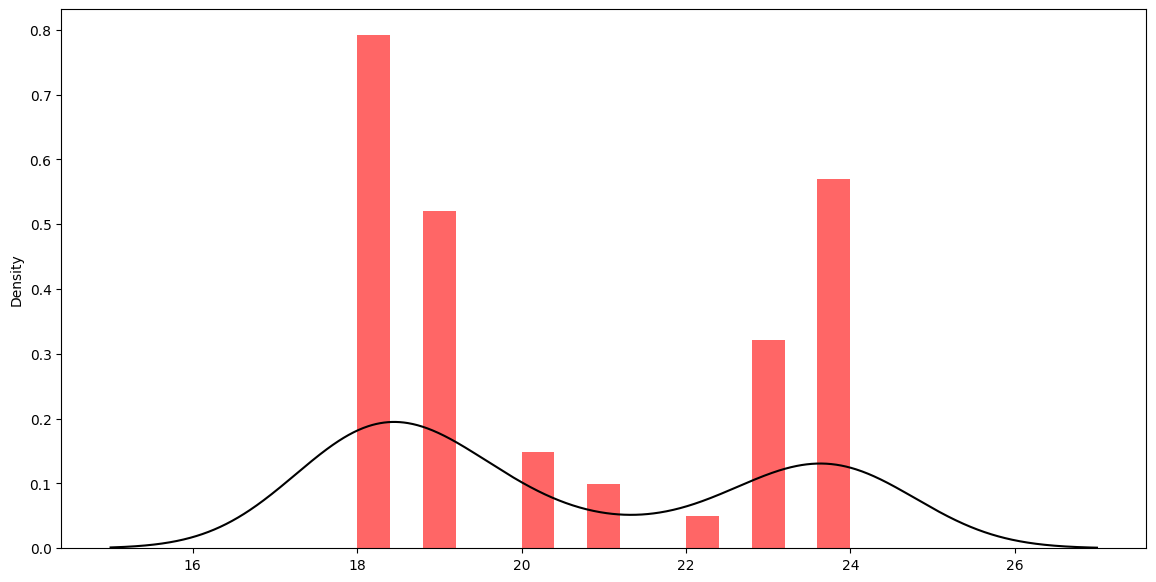

In [ ]:
# Melihat distribusi usia.
plt.figure(figsize=(14,7))
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
df["Age"].plot(kind='density', color='black')
plt.show()

Dengan info di atas, mengatakan bahwa:

* Kami memiliki mahasiswa dari usia antara 18 - 24 tahun.
* Kami tidak memiliki banyak tanggapan dari mahasiswa berusia 20-23 tahun.